In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch #用于进行层次聚类，画层次聚类图的工具包
import scipy.spatial.distance as ssd
from scipy.cluster.vq import vq,kmeans,whiten
import numpy as np
import pandas as pd

In [2]:
from sklearn import datasets
iris=datasets.load_iris()#导入iris数据
#数据转换成Dataframe形式
A=pd.DataFrame(iris.data,columns=iris.feature_names)
A

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [3]:
#计算数据的行数
list_num=iris.data.shape[0]
#生成点与点之间的距离矩阵，这里用欧式距离：
disNewdata = sch.distance.pdist(iris.data,'euclidean')#是距离数组
#将disNewdata数组变成一个矩阵
disMat = pd.DataFrame(sch.distance.squareform(disNewdata.round(2)),columns=[i for i in range(list_num)],index=[i for i in range(list_num)])
disMat

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.00,0.54,0.51,0.65,0.14,0.62,0.52,0.17,0.92,0.47,...,5.02,4.64,4.21,5.26,5.14,4.65,4.28,4.46,4.65,4.14
1,0.54,0.00,0.30,0.33,0.61,1.09,0.51,0.42,0.51,0.17,...,5.07,4.70,4.18,5.32,5.21,4.70,4.25,4.50,4.72,4.15
2,0.51,0.30,0.00,0.24,0.51,1.09,0.26,0.41,0.44,0.32,...,5.23,4.87,4.33,5.48,5.35,4.86,4.43,4.66,4.85,4.30
3,0.65,0.33,0.24,0.00,0.65,1.17,0.33,0.50,0.30,0.32,...,5.10,4.76,4.18,5.35,5.23,4.75,4.29,4.53,4.72,4.15
4,0.14,0.61,0.51,0.65,0.00,0.62,0.46,0.22,0.92,0.53,...,5.06,4.69,4.25,5.30,5.17,4.70,4.33,4.50,4.68,4.17
5,0.62,1.09,1.09,1.17,0.62,0.00,0.99,0.70,1.46,1.01,...,4.64,4.25,3.93,4.87,4.74,4.28,3.99,4.10,4.26,3.82
6,0.52,0.51,0.26,0.33,0.46,0.99,0.00,0.42,0.55,0.48,...,5.15,4.80,4.26,5.40,5.27,4.80,4.38,4.59,4.75,4.22
7,0.17,0.42,0.41,0.50,0.22,0.70,0.42,0.00,0.79,0.33,...,4.96,4.59,4.12,5.20,5.08,4.60,4.20,4.40,4.59,4.06
8,0.92,0.51,0.44,0.30,0.92,1.46,0.55,0.79,0.00,0.56,...,5.27,4.94,4.31,5.52,5.41,4.91,4.43,4.70,4.89,4.30
9,0.47,0.17,0.32,0.32,0.53,1.01,0.48,0.33,0.56,0.00,...,5.03,4.67,4.14,5.27,5.17,4.67,4.22,4.46,4.67,4.11


距离矩阵，是一个对称矩阵

#Z返回值：numpy.ndarry 一共由4列组成：  
第1列与第2列字段分别为聚类簇的编号     
第3列表示前两个聚类簇之间的距离   
第4列表示新生成聚类簇所包含的元素的个数

In [4]:
#进行层次聚类：使用平均距离作为类间距
Z=sch.linkage(disNewdata,method='average')

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',

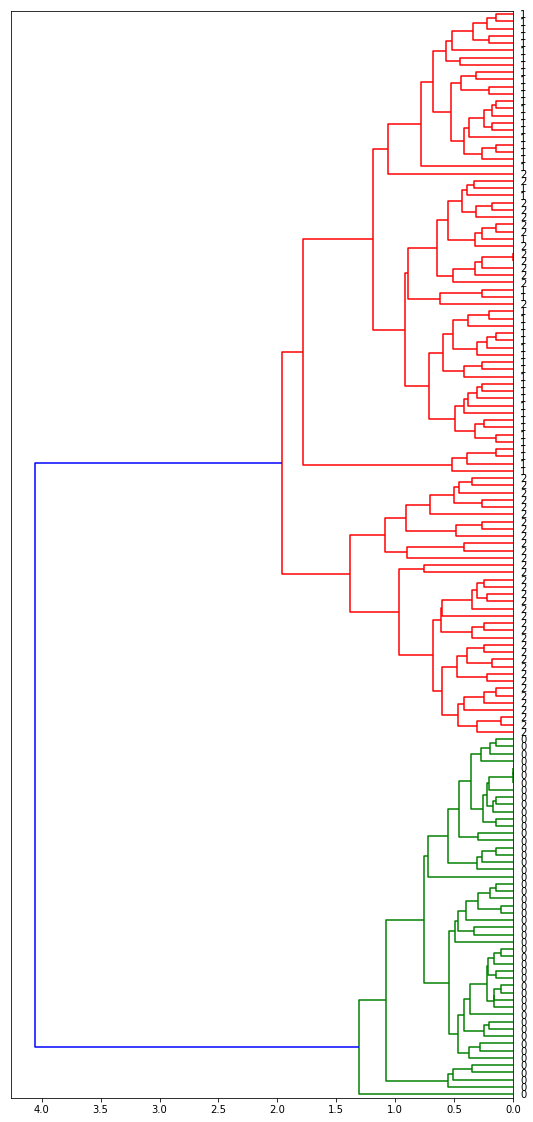

In [5]:
##将层级聚类结果以树状图表示出来
fig=plt.figure(figsize=(9,20))
sch.dendrogram(Z,labels = iris.target,orientation='left',leaf_rotation=0,leaf_font_size=10)

裁剪

In [6]:
#裁剪成三类，并将分类加入dataframe数据
label = sch.cut_tree(Z,n_clusters=3)
A['label']=label
A

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


绘制两个主成分方向坐标的散点图

Text(0.5,1,'cluster by hierarchy')

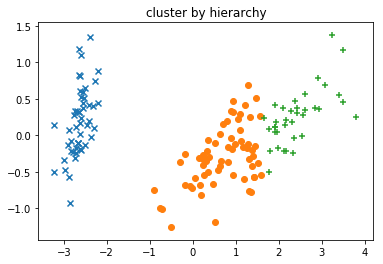

In [7]:
from sklearn.decomposition import PCA
iris_pca = PCA(n_components=2)
iris_pca_score = iris_pca.fit_transform(iris.data)
for cluster,marker in zip(range(3),['x','o','+']):
    x_axis = iris_pca_score[:,0][A['label'] == cluster]
    y_axis = iris_pca_score[:,1][A['label'] == cluster]
    plt.scatter(x_axis,y_axis,marker=marker)
plt.title('cluster by hierarchy')

与原始数据比较

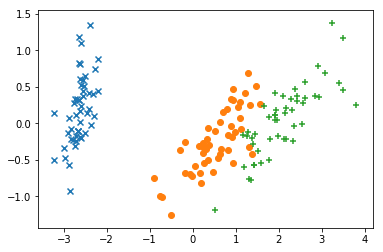

In [8]:
for cluster, marker in zip(range(3), ['x', 'o', '+']):
    x_axis = iris_pca_score[:, 0][iris.target == cluster] #降维之后第一维数据
    y_axis = iris_pca_score[:, 1][iris.target == cluster] #降维之后第二维数据
    plt.scatter(x_axis, y_axis, marker=marker)  
plt.show()

绘制热点图

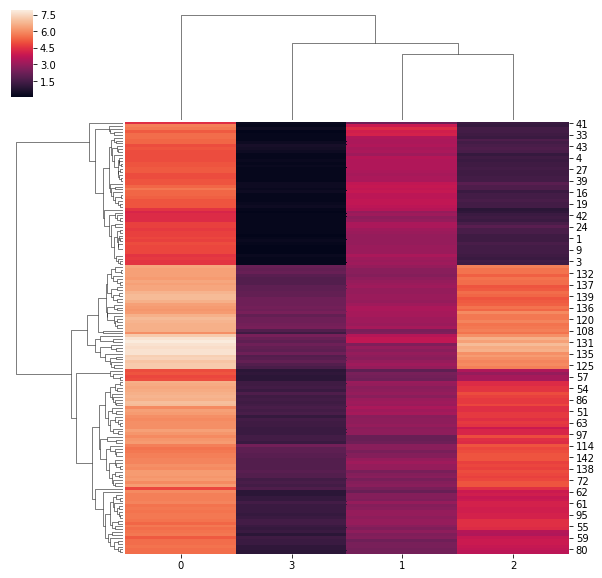

In [9]:
import seaborn as sns
sns.clustermap(iris.data,method ='average',metric='euclidean')